In [1]:
from catboost import Pool, CatBoostRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import shap
import numpy as np
import os

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [3]:
path_to_data = os.path.join(os.path.expanduser('~'), "Documents/CatTheory/CO2RR_selectivity_ML/Data/Datasets/BSc/smogn")

df = pd.read_csv(path_to_data + "/smogn_C2H4", index_col=False)

X = df.iloc[:,1:8]
y = df.iloc[:,-1]

In [4]:
model = CatBoostRegressor(rsm=0.4, learning_rate=0.3, depth=2, l2_leaf_reg=8, iterations=1500, bagging_temperature=1, loss_function='RMSE',verbose=False, random_seed=0)

train_pool = Pool(X, y)

# Training the model
model.fit(train_pool)

In [5]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(X)

In [6]:
shap_values_prediction = shap_values[0]  # For the prediction
shap_values_uncertainty = shap_values[1]  # For the uncertainty

In [7]:
shap_values.shape

(36, 7)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


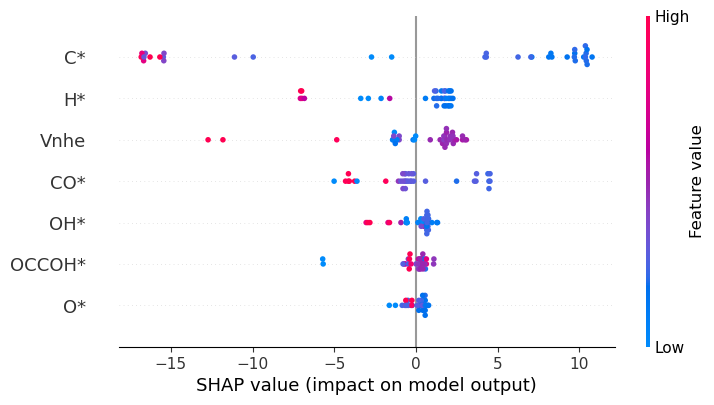

In [8]:
shap.plots.beeswarm(shap_values, show=False)

path_to_figs = os.path.join(os.path.expanduser('~'), "Dropbox/Apps/Overleaf/bsc_project/graphics/")

plt.savefig(path_to_figs + 'shap_C2H4.pdf', bbox_inches='tight')
plt.show()

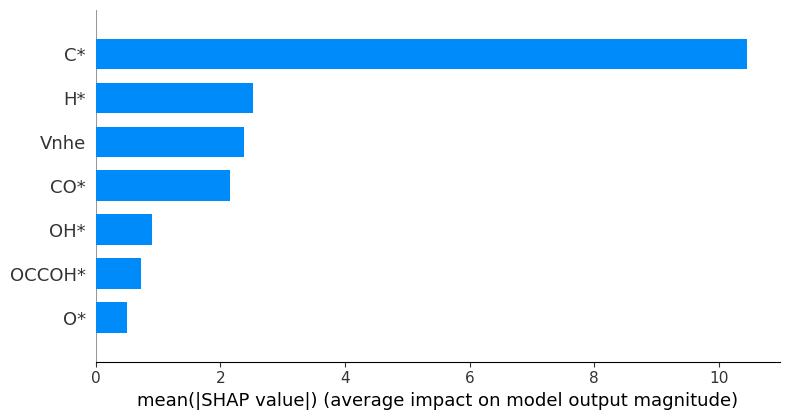

In [9]:
shap.summary_plot(shap_values, X, plot_type='bar')


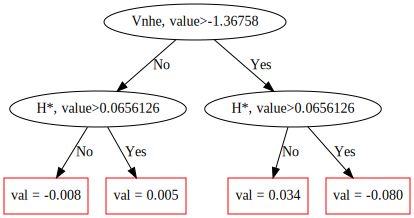

In [10]:
model.plot_tree(tree_idx=100, pool=train_pool)